# Numpy Basics

Numpy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis.

While numpy by itslef does not provide very much high-level data anlaytical funcionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools like pandas much more effectively.
While NumPy provides the computational foundation for these operations, you will likely want to use pandas as your basis for most kids of data analysis as it provides a rich, high-level interface making most common data tasks very concise and simple.

## The Numpy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large data sets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements

An ndarray is a generic multidimensional container for homogeneous data; that is, <mark>all of the elements must be the same type. Every array has a *shape*, a tuple indicating the size of each dimension, and a *dtype*, an object describing the **data type** of the array.</mark>

The easiest way to create an array is to use the `array` function. This accepts any sequence-like object and produces a new NumPy array containing the passed data.

In [1]:
import numpy as np
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [2]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [3]:
arr2.ndim

2

In [4]:
arr2.shape

(2, 4)

`np.array` tries to infer a good data type for the array that it creates. The data type is stored in a special *dtype* object.

In [5]:
arr1.dtype

dtype('float64')

There are a number of other functions for creating new arrays. As examples, `zeros` and `ones` creates arrays of 0's or 1's, respectively with a given length or shape. `empty` creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape

In [6]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [8]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

`arange` is an array-valued version of the built-in Python `range` function.

In [9]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

|Function|Description|
|:--:|:--:|
|`array`|Convert input data to an ndarray either by inferring a dtype or explicitly specifying a `dtype`. Copies the input data by default|
|`asarray`|Convert input to ndarray, but do not copy if the inputs is already an ndarray|
|`arange`|Like the built-in `range` but returns an ndarray instead of a list|
|`ones`, `ones_like`|Produce an array of all 1's with the given shape and dtype. `ones_like` takes another array and produces a ones array of the same shape and dtype|
|`zeros`, `zeros_like`| Like `ones` and `ones_like` but producing arrays of 0's instead| 
|`empty`, `empty_like`| Create new arrays by allocating new memory, but do not populate with any values like `ones`and `zeros`|
|`eye`, `identity`| Create a square $N \times N$ identity matrix (1's on the diagonal and 0's elsewhere)|

## Data Types for ndarrays

The *data type* or `dtype` is a special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data.

In [10]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [11]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [12]:
arr1.dtype

dtype('float64')

In [13]:
arr2.dtype

dtype('int32')

<mark>The numerical dtypes are named the same way: a type name, like *float* or *int*, followed by a numeric indicating the number of bits per element</mark>. In most cases they map directly onto an underlying machine representation, which makes it easy to read and write binary streams of data to disk and also to connect to code written in a low-level laguage like C or Fortran. A standard dobule-precision floating point value takes up a 8 bytes or 64 bits. Thus, this type is known in NumPy as *float64*.

You can explicitly convert or *cast* an array from one dtpye to another using ndarray's `astype` method:

In [14]:
arr = np.array([1, 2, 3, 4, 5])

In [15]:
arr.dtype

dtype('int64')

In [16]:
float_arr = arr.astype(np.float64)

In [17]:
float_arr.dtype

dtype('float64')

<mark>If you had an array of string representing numbers, you can use `atype` to conver them to numeric form</mark>

In [18]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [19]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason a *TypeError* will be raised. NumPy is smart enough to alias the Python types to the equivalent dtypes; in this code we used *float* instead of *np.float64*.

There are shorthand type code strings you can also use to refer to a dtype:

In [20]:
empty_uint32 = np.empty(8, dtype='u4')

In [21]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

---


## Operations between Arrays and Scalars

Arrays are important because they enable you to express batch operations on data without any *for* loops. This is usually called **vectorization**. <mark>Any arithmetic-operations between **equal-size** arrays applies the operation elementwise</mark>:

In [22]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [23]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [24]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [25]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

<mark>Arithmetic operations</mark> with scalars, <mark>propagate the value</mark> to each element:

In [26]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

Operations between differently sized arrays is called **broadcasting**

## Basic Indexing and Slicing

One dimensional arrays are simple; on the sruface they act similarly to Python lists:

In [27]:
arr = np.arange(10)

In [28]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
arr[5]

5

In [30]:
arr[5:8]

array([5, 6, 7])

In [31]:
arr[5:8] = 12

In [32]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in `arr[5:8] = 12`, the value is propagated (or *broadcasted* henceforth) to the entire selection. An important first distinction from lists is that array slices are **views** on the original array. This means that <mark>the data is not copied, and any modifications to the **view** will be reflected in the source array</mark>:

In [33]:
arr_slice = arr[5:8]

In [34]:
arr_slice[1] = 12345

In [35]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [36]:
arr_slice[:] = 64

In [37]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In a two-dimensional array, the elements at each index are no logner scalars but rather one-dimensional arrays.

Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indicies to select individual elements.

In [38]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [39]:
arr2d[2]

array([7, 8, 9])

In [40]:
arr2d[0][2]

3

In [41]:
arr2d[0, 2]

3

If you omit later indices, the returned object will be a lower-dimensional ndarray consisting of all the data along the higher dimensions. So in the $2 \times 2 \times 3$ array `arr3d`

In [42]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [43]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Both scalar values and arrays can be assigned to `arr3d[0]`

In [44]:
old_values = arr3d[0].copy()

In [45]:
arr3d[0] = 42

In [46]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0] = old_values

In [48]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced using the familiar syntax:

In [49]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Higher dimensional objects give you more options as you can slice one or more axes and also mix integres. Slicing this 2d arrays a bit different:

In [50]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see it has sliced along axis 0, the first axis. A slice, therefore, selects a range of elements along an axis. You can pass multiple slices:

In [52]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

## Boolean Indexing

Let's consider an example where we have some data in an array and an array of names with duplicates. I'm going to use here the `randn` function in `numpy.random` to generate some random normally distributed data:

In [53]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [54]:
data = np.random.randn(7, 4)

In [55]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [56]:
data

array([[ 1.27264956,  0.37221588,  0.31569817,  1.41701588],
       [-0.18254387, -0.6215885 , -0.5204985 , -0.34849323],
       [-1.60044438, -1.09444081, -0.83242701, -0.37560548],
       [ 0.98597813,  0.11233166, -2.26164872, -0.25247251],
       [ 0.38458109, -0.0674798 ,  0.47987875,  0.07092431],
       [ 0.23467302,  2.04540752,  0.14276263,  0.35381103],
       [ 1.00746217, -1.61398048,  0.67468127,  0.83643423]])

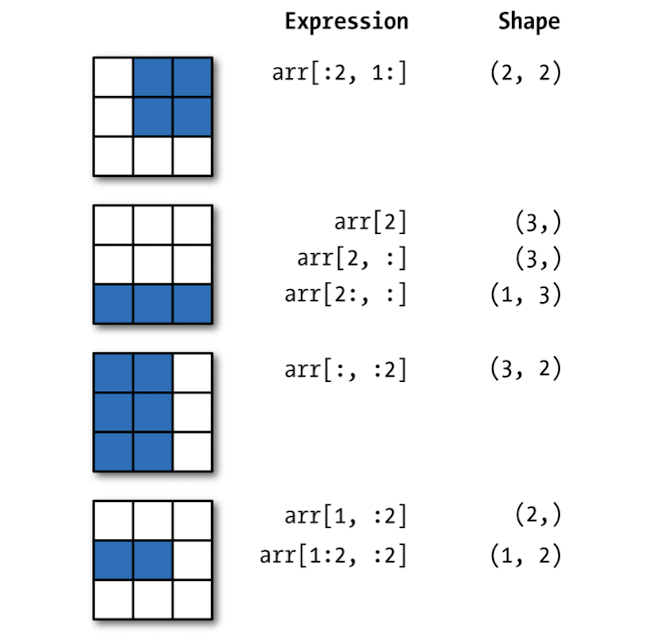

If we wanted to select all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons with arrays are also vectorized.

In [57]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

<mark>The boolean array must be of the same length as the axis it's indexing</mark>. You can even mix and match boolean arays with slices or integers.

It is called fancy indexing, if arrays are indexed by using boolean or integer arrays (masks). The result will be a copy and not a view. <mark>The new array contains all the elements where the corresponding value is True</mark>

In [58]:
data[names == 'Bob', 2:]

array([[ 0.31569817,  1.41701588],
       [-2.26164872, -0.25247251]])

To select everything but 'Bob', you can either use `!=` or negate the condition using `-`

In [59]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [60]:
data[~(names == 'Bob')]

array([[-0.18254387, -0.6215885 , -0.5204985 , -0.34849323],
       [-1.60044438, -1.09444081, -0.83242701, -0.37560548],
       [ 0.38458109, -0.0674798 ,  0.47987875,  0.07092431],
       [ 0.23467302,  2.04540752,  0.14276263,  0.35381103],
       [ 1.00746217, -1.61398048,  0.67468127,  0.83643423]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like `&` (and) and `|` (or) 

In [61]:
mask = (names == 'Bob') | (names == 'Will')

In [62]:
mask

array([ True, False,  True,  True,  True, False, False])

Selecting data from an array by boolean indexing <u>always</u> creates a copy of the data, even if the returned array is unchanged.

Setting values with boolean arrays works in a common-sense way. To set all of the negative values in *data* to 0 we need only do:

In [63]:
data[data<0] = 0

In [64]:
data

array([[1.27264956, 0.37221588, 0.31569817, 1.41701588],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.98597813, 0.11233166, 0.        , 0.        ],
       [0.38458109, 0.        , 0.47987875, 0.07092431],
       [0.23467302, 2.04540752, 0.14276263, 0.35381103],
       [1.00746217, 0.        , 0.67468127, 0.83643423]])

Setting the whole rows or columns using a 1D boolean array is also easy:

In [65]:
data[names != 'Joe'] = 7

In [66]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.23467302, 2.04540752, 0.14276263, 0.35381103],
       [1.00746217, 0.        , 0.67468127, 0.83643423]])

## Fancy indexing

**Fancy indexing** is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had a $8 \times 4$ array:

In [67]:
arr = np.empty((8, 4))

In [68]:
for i in range(8):
    arr[i] = i

In [69]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows i a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [70]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative indices select rows from the end:

In [71]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a 1D array of elements corresponding to each tuple of indices:

In [72]:
arr = np.arange(32).reshape((8, 4))

In [73]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [74]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

The rectangular region formed by selecting a subset of the matrix's rows and columns.

In [75]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

This code is indexing a NumPy array `arr` using two sets of indices.

The first set of indices `[1, 5, 7, 2]` selects the rows of the array. Specifically, it selects the rows with indices 1, 5, 7, and 2 in that order.

The second set of indices `[:, [0, 3, 1, 2]]` selects the columns of the array. The `:` before the comma indicates that all rows should be selected. The second set of indices `[0, 3, 1, 2]` selects the columns with indices 0, 3, 1, and 2 in that order.

So, the overall effect of this code is to select a subset of rows and columns from the original array `arr`. The resulting array will have the same number of rows as the number of indices in the first set, and the same number of columns as the number of indices in the second set.


Another way is to use `np.ix_` function, which converts two 1D integer arrays to an indexer that selects the square region:

In [76]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

The first code `arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]` uses basic indexing to select the rows and columns. It first selects the rows with indices `[1, 5, 7, 2]` and then selects the columns with indices `[0, 3, 1, 2]`. This method creates two intermediate arrays, which can be inefficient for large arrays.

The second code `arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]` uses the `np.ix_` function to create an open mesh grid from the row and column indices. This method returns a tuple of index arrays that can be used to directly index the original array `arr`. <mark>This method is more efficient than the first method because it avoids creating intermediate arrays</mark>.

<mark>In summary, both methods achieve the same result, but the second method is more efficient for large arrays.</mark>

<mark>Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.</mark>

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping which similarly <mark>returns a view</mark> on the underlying data without copying anything. Arrays have the `transpose` method and also the special `T` attribute:

In [77]:
arr = np.arange(15).reshape((3, 5))

In [78]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you will do this very often, like for example computting the **inner matrix product** $X^{T}X$ using `np.dot`

In [80]:
arr = np.random.randn(6, 3)

In [81]:
np.dot(arr.T, arr)

array([[ 7.66794022,  1.52720313,  5.18401604],
       [ 1.52720313,  2.2809973 , -0.64641249],
       [ 5.18401604, -0.64641249,  6.33346164]])

For higher dimensional arrays, `transpose` will accept a tuple of axis numbers to permute the axes (for extra bending)

In [82]:
arr = np.arange(16).reshape((2, 2, 4))

In [83]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [84]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In the context of NumPy arrays,<mark>"axes" refer to the dimensions of the array. Each dimension of an array is called an axis.</mark>

the `transpose()` function on the array arr. The argument (1, 0, 2) passed to transpose() specifies the order in which the axes should be transposed. The numbers in the argument indicate the new order of the axes.

In this case, the original array arr has axes with indices 0, 1, and 2. The transpose() function rearranges the axes according to the given order.

After the transpose operation, the resulting array will have dimensions (2, 2, 4).

Simple transposing with `.T` is just a special case of swapping axes. `ndarray` has the method `swapaxes` which takes a pair of axis numbers

In [85]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [86]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

`swapaxes` similarly returns a view on the data without making a copy.

# Universal Functions: Fast Element-wise Array Functions

A universal function, or *unfunc*, is a function that performs elementwise operations on data in ndarrays. You can think of them as fast **vectorized** wrappers for simple functions that take one or more scalar values and produce on or more scalar results. Like `sqrt` or `exp`:

In [87]:
arr = np.arange(10)

In [88]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [89]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as *unary* ufuncs. Others, such as `add` or `maximum`, take 2 arrays (this, *binary* ufuncs) and return a single array as the result

In [90]:
x = np.random.randn(8)

In [91]:
y = np.random.randn(8)

In [92]:
x

array([ 1.22927085,  0.09743085,  0.08472344,  0.47243018, -0.64558464,
        0.8330869 ,  0.06719369,  0.8394431 ])

In [93]:
y

array([-0.99366401, -1.0602896 ,  0.3886836 ,  1.31420069, -1.55811029,
       -1.69831036, -0.27100982, -1.52499242])

In [94]:
np.maximum(x, y) #element

array([ 1.22927085,  0.09743085,  0.3886836 ,  1.31420069, -0.64558464,
        0.8330869 ,  0.06719369,  0.8394431 ])

The built-in Python `divmod`: it takes two numbers as arguments and returns a tuple containing the quotient and remainder when the first number is divided by the second number.

`modf` is one example, a **vectorized** version, it returns the fractional and integral parts of a floating point array .t

In [95]:
arr = np.random.randn(7) * 5

In [96]:
np.modf(arr)

(array([-0.59088121,  0.3406811 ,  0.72378393,  0.03968206,  0.09046233,
         0.57860601,  0.91193124]),
 array([-2.,  6.,  0.,  1.,  2.,  0.,  1.]))

# Data Processing Using Arrays

NumPy arrays enables you to express many kinds of data processing tasks that might otherwise require writing loops. This practice of <mark>replacing explicit loops with array expressions is commonly referred to as *vectorization*</mark>. Vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

Suppose we wished to evaluate the function `sqrt(x^2 + y^2)` across a regular grid of values. The `np.meshgrid` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays.

In [97]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

The arange() function in NumPy is similar to the built-in range() function in Python, but it allows you to work with floating-point numbers and specify a step size.

In this particular line, the arange() function is used to <mark>generate a sequence of numbers starting from -5, incrementing by 0.01, and stopping just before 5</mark>. The resulting array points will contain values from -5 (inclusive) to 5 (exclusive), with a step size of 0.01 between each consecutive element.

In [98]:
xs, ys = np.meshgrid(points, points)

In [100]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [99]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In this example, np.meshgrid() takes two 1-D arrays x and y and returns two 2-D arrays `xs` and `ys`. The array `xs` contains the repeated values of points along the rows to form a matrix, and the array points contains the repeated values of y along the columns to form a matrix. The resulting matrices represent the coordinate grid for the x and y dimensions.

The np.meshgrid() function is particularly useful when you want to evaluate a function or perform operations on a grid of points. It is commonly used in tasks like generating 2D plots, evaluating functions over a grid, or performing calculations that involve multiple dimensions.

Here's an example

```python
import numpy as np

x = np.array([1, 2, 3])
y = np.array([10, 20, 30, 40])

X, Y = np.meshgrid(x, y)

print("X:")
print(X)
print("Y:")
print(Y)
```
output:
```python
X:
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
Y:
[[10 10 10]
 [20 20 20]
 [30 30 30]
 [40 40 40]]
```

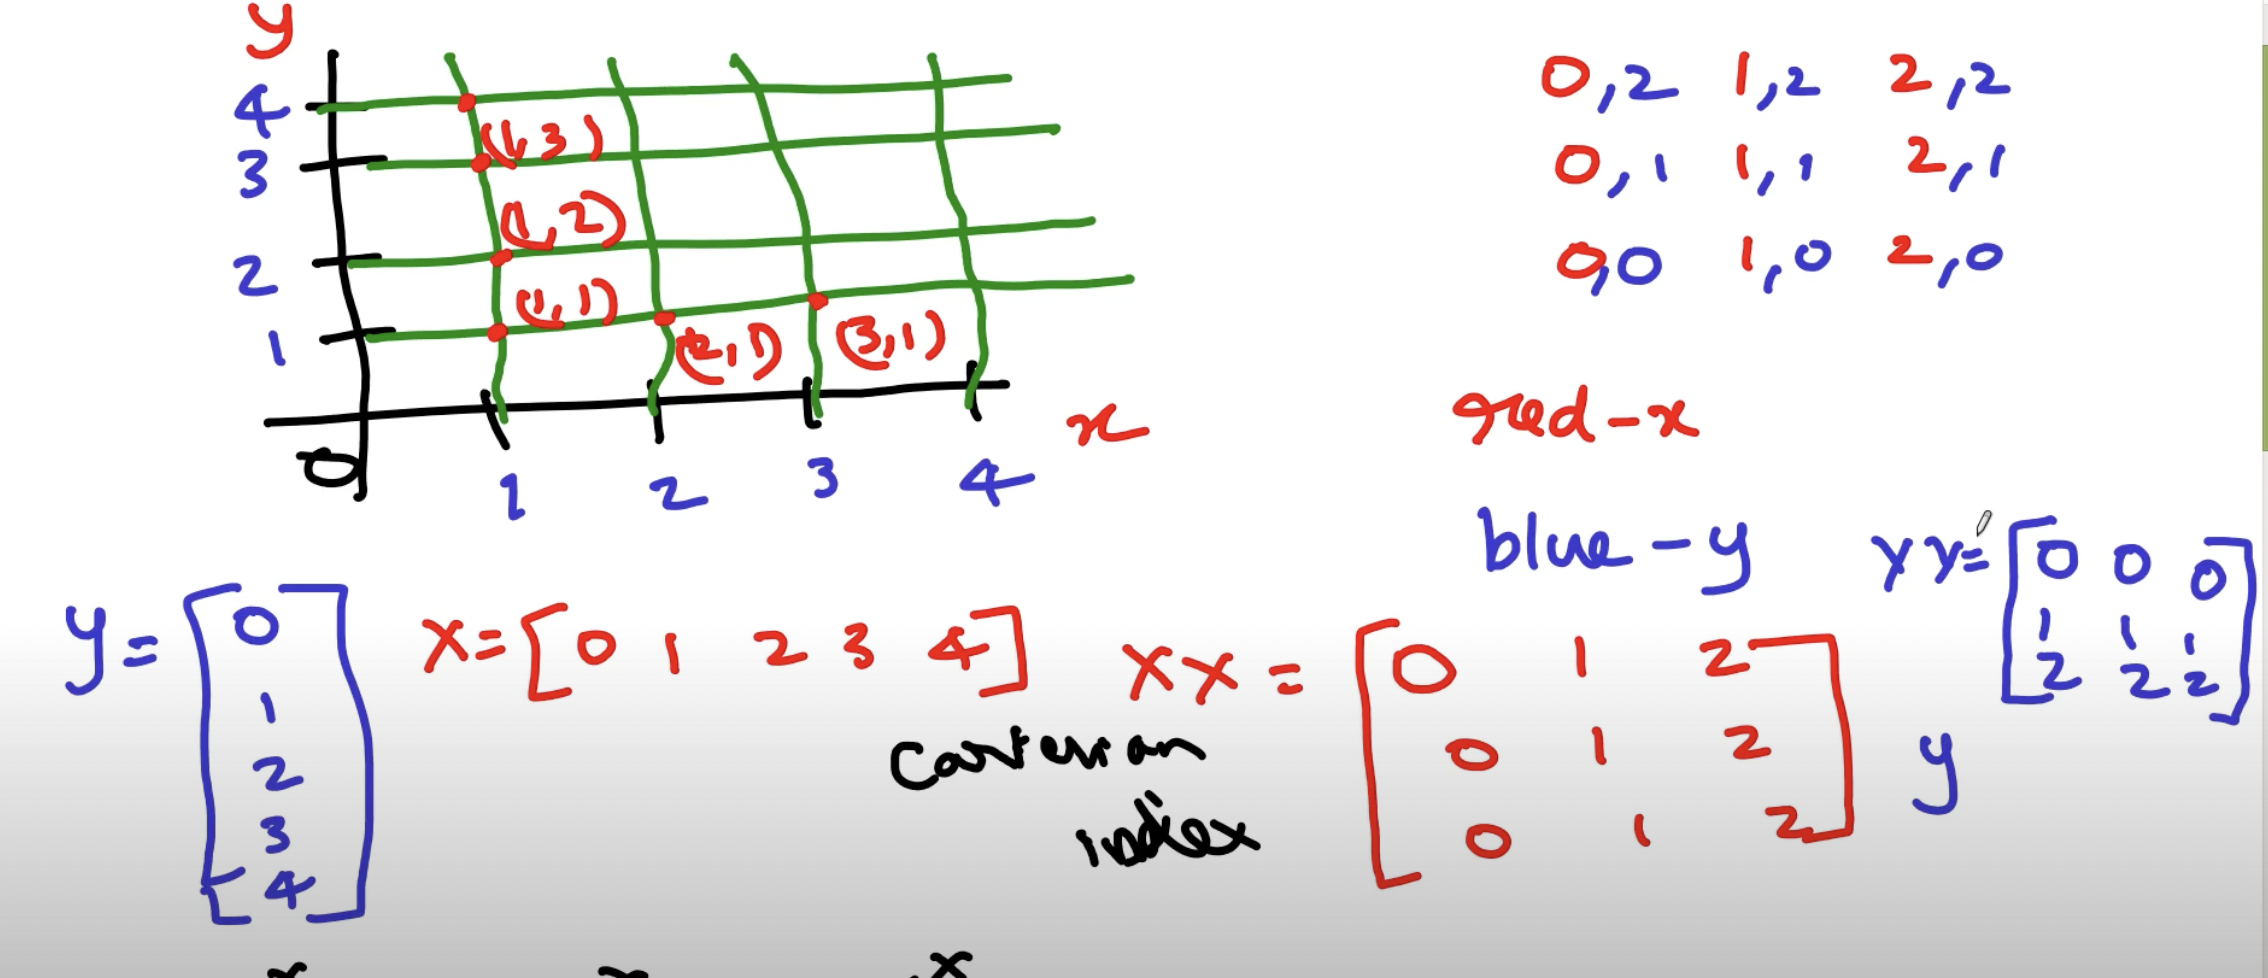

Now, evaluating the function is a simple matter of writing the same expression you would write two points

In [121]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

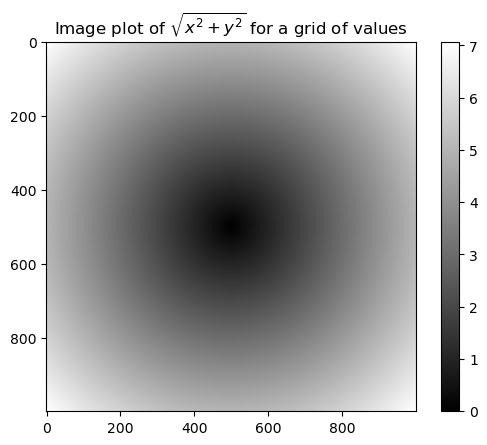

In [106]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# Expressing Conditional Logic as Array Operations

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a boolean array and two arrays of values:

In [110]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [111]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [112]:
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from `xarr` whenever the corresponding value in `cond` is `True` otherwise take the value from `yarr`. A list comprehension doing this might look like:

In [113]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [114]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

The `zip()` function in Python is used to combine multiple iterables (such as lists, tuples, or other sequences) into a single iterator of tuples. 

```python
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 35]
countries = ["USA", "Canada", "Australia"]

zipped = zip(names, ages, countries)

for item in zipped:
    print(item)
```

Output:

```python
('Alice', 25, 'USA')
('Bob', 30, 'Canada')
('Charlie', 35, 'Australia')
```

<mark>If the provided iterables have different lengths, zip() will stop producing tuples as soon as the shortest iterable is exhausted.</mark>

This has multiple problems. First, itwill not be very fast for large arrays (because all the work is being done in pure Python). Secondly, it will not work with multidimensional arrys. With `np.where` you can write this very concisely:

In [115]:
result = np.where(cond, xarr, yarr)

In [116]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

<mark>The second and third arguments to `np.where` don't need to be arrays; one or both of them can be scalars</mark>. A typical use of `where` in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with -2. This is very easy to do with `np.where`:

In [117]:
arr = np.random.randn(4, 4)

In [118]:
arr

array([[ 0.54939983,  0.63189627, -2.54544783, -1.9016735 ],
       [ 0.38453087,  0.60824987,  0.2442122 ,  0.10234211],
       [ 0.76761187, -0.99721774, -2.04945716, -0.32913565],
       [ 0.17493398, -0.25442183, -1.37168577, -1.91098366]])

In [119]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [ 2,  2,  2,  2],
       [ 2, -2, -2, -2],
       [ 2, -2, -2, -2]])

You can also use `where`to express more complicated logic; For example If we have two boolean arrays, `cond1` and `cond2` and wish to assign a different value for each of the 4 possible pairs of boolean values:

```python 
result = []
for i in range(n):
    if cond[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
```

This `for` loop can be converted into a nested `where` expression:

```python
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))
```

In this particular example, since the boolean values are treated as 0 or 1 calculations, this could be alternatively expressed


```python
result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)
```